In [1]:
from resnet import train_resnet_model, train_resnet_model_k_fold, train_resnet_model_k_fold
from keras_preprocessing.image import ImageDataGenerator

2022-11-10 17:52:39.328812: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
img_size = 32
target_size = (img_size,img_size)
num_classes = 8
batch_size = 64
number_of_epochs = 50

# Updated Training Method

In [3]:
train_resnet_model_k_fold(num_classes, img_size,"/mnt/sda1/igtd-encoding/data/", number_of_epochs, "/mnt/sda1/resnet-models/IGTD/", 5, batch_size)

2022-11-10 17:52:40.824941: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-10 17:52:40.825651: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-10 17:52:40.853216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 17:52:40.853390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2022-11-10 17:52:40.853411: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-10 17:52:40.854934: I tensorflow/stream_executor/platform/d

Fold:  0
Found 192000 images belonging to 8 classes.
Found 48000 images belonging to 8 classes.


2022-11-10 17:52:45.564027: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 36.19M (37945344 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2022-11-10 17:52:45.564486: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 32.57M (34150912 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2022-11-10 17:52:45.564878: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 29.31M (30735872 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2022-11-10 17:52:56.041926: W tensorflow/core/common_runtime/bfc_allocator.cc:433] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.25MiB (rounded to 2359296)requested by op Mul
Current allocation summary follows.
2022-11-10 17:52:56.042020: I tensorflow/core/common_runtime/bfc_allocator.cc:972] BFCAllocator dump for GPU_0_bfc
2022-11-10 17:52:56.042059: I tensorflow/core/common_runtime/bfc_allocator.cc:979] Bin (256): 	Total Chunks: 54, Chunks in us

ResourceExhaustedError: OOM when allocating tensor with shape[3,3,256,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul]

# DEPRECATED TRAINING!!!!!!!!!

# Create IGTD Dataset

In [3]:
train_dir_igtd = "/mnt/sda1/image-results-darknet/Train/"
valid_dir_igtd = "/mnt/sda1/image-results-darknet/Validation/"

train_datagen_igtd = ImageDataGenerator()
train_generator_igtd = train_datagen_igtd.flow_from_directory(train_dir_igtd,batch_size=batch_size,shuffle=True,class_mode='categorical',target_size=target_size)
validation_datagen_igtd = ImageDataGenerator()
validation_generator_igtd = validation_datagen_igtd.flow_from_directory(valid_dir_igtd, shuffle=True,batch_size=batch_size,class_mode='categorical',target_size=target_size)

Found 216000 images belonging to 8 classes.
Found 24000 images belonging to 8 classes.


# Create Flow Wrapping Dataset

In [6]:
train_dir_flow = "/mnt/sda1/flow-wrapping/Train/"
valid_dir_flow = "/mnt/sda1/flow-wrapping/Validation/"

train_datagen_flow = ImageDataGenerator()
train_generator_flow = train_datagen_flow.flow_from_directory(train_dir_flow,batch_size=batch_size,shuffle=True,class_mode='categorical',target_size=target_size)
validation_datagen_flow = ImageDataGenerator()
validation_generator_flow = validation_datagen_flow.flow_from_directory(valid_dir_flow, shuffle=True,batch_size=batch_size,class_mode='categorical',target_size=target_size)

Found 216000 images belonging to 8 classes.
Found 24000 images belonging to 8 classes.


# Create Binary Encoding Dataset

In [3]:
train_dir_binary = "/mnt/sda1/binary-encoding/Train/"
valid_dir_binary = "/mnt/sda1/binary-encoding/Validation/"

train_datagen_binary = ImageDataGenerator()
train_generator_binary = train_datagen_binary.flow_from_directory(train_dir_binary,batch_size=batch_size,shuffle=True,class_mode='categorical',target_size=target_size)
validation_datagen_binary = ImageDataGenerator()
validation_generator_binary = validation_datagen_binary.flow_from_directory(valid_dir_binary, shuffle=True,batch_size=batch_size,class_mode='categorical',target_size=target_size)

Found 176001 images belonging to 8 classes.
Found 64000 images belonging to 8 classes.


# Train IGTD

In [4]:
model, history, times = train_resnet_model(num_classes, img_size,train_generator_igtd,number_of_epochs, validation_generator_igtd, "/mnt/sda1/resnet-models/")

2022-11-07 09:48:21.675098: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-07 09:48:21.676613: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-07 09:48:21.708767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 09:48:21.709086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2022-11-07 09:48:21.709106: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-07 09:48:21.747279: I tensorflow/stream_executor/platform/d

Epoch 1/50


2022-11-07 09:48:29.513768: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-07 09:48:30.231246: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-11-07 09:48:31.407464: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-11-07 09:48:31.456025: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


   2/3375 [..............................] - ETA: 8:05 - loss: 2.4918 - acc: 0.0586 - f1_m: 0.0192 - precision_m: 0.0536 - recall_m: 0.0117 - auc: 0.5416 - false_negatives: 95.0000 - false_positives: 13.5000 - true_negatives: 658.5000 - true_positives: 1.0000 - mean_absolute_error: 0.2175 - mean_squared_error: 0.1221    

2022-11-07 09:49:05.193397: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-11-07 09:49:05.193429: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-11-07 09:49:05.247230: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-11-07 09:49:05.249025: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2022-11-07 09:49:05.258754: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1734 callback api events and 1682 activity events. 
2022-11-07 09:49:05.287139: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-11-07 09:49:05.321664: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/resnet-models/tb_logs/train/plugins/profile/2022_11_07_09_49_05
2022-11-07 09:49:05.343813: I tensorflow/core/profiler/rpc/client/save_profi

3375/3375 [==============================] - 1769s 512ms/step - loss: 1.1026 - acc: 0.5963 - f1_m: 0.5542 - precision_m: 0.7658 - recall_m: 0.4779 - auc: 0.8945 - false_negatives: 45752.6534 - false_positives: 12045.7802 - true_negatives: 744402.0871 - true_positives: 62311.3276 - mean_absolute_error: 0.1240 - mean_squared_error: 0.0618 - val_loss: 1.1498 - val_acc: 0.6072 - val_f1_m: 0.6333 - val_precision_m: 0.7658 - val_recall_m: 0.5412 - val_auc: 0.9105 - val_false_negatives: 11011.0000 - val_false_positives: 3963.0000 - val_true_negatives: 164037.0000 - val_true_positives: 12989.0000 - val_mean_absolute_error: 0.1137 - val_mean_squared_error: 0.0633

Epoch 00001: val_acc improved from -inf to 0.60717, saving model to /mnt/sda1/resnet-models/resnet50v2-saved-model-01-val_acc-0.61.hdf5
Epoch 2/50
3375/3375 [==============================] - 158s 47ms/step - loss: 0.3523 - acc: 0.8783 - f1_m: 0.8785 - precision_m: 0.9059 - recall_m: 0.8532 - auc: 0.9897 - false_negatives: 15398.2773 

# Train Flow Wrapping

In [7]:
model, history, times = train_resnet_model(num_classes, img_size,train_generator_flow,number_of_epochs, validation_generator_flow, "/mnt/sda1/resnet-models/Flow/")

2022-11-08 07:25:27.308166: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-08 07:25:27.308895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-08 07:25:27.343865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 07:25:27.344182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2022-11-08 07:25:27.344205: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-08 07:25:27.377568: I tensorflow/stream_executor/platform/d

Epoch 1/50


2022-11-08 07:25:36.643744: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-08 07:25:39.339431: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-11-08 07:25:40.556316: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-11-08 07:25:40.596244: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


   2/3375 [..............................] - ETA: 8:30 - loss: 2.3338 - acc: 0.1367 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - auc: 0.5441 - false_negatives: 96.0000 - false_positives: 8.0000 - true_negatives: 664.0000 - true_positives: 0.0000e+00 - mean_absolute_error: 0.2158 - mean_squared_error: 0.1164    

2022-11-08 07:26:07.230520: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-11-08 07:26:07.230555: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-11-08 07:26:07.283228: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-11-08 07:26:07.285153: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2022-11-08 07:26:07.295769: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1730 callback api events and 1678 activity events. 
2022-11-08 07:26:07.322990: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-11-08 07:26:07.358194: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/resnet-models/Flow/tb_logs/train/plugins/profile/2022_11_08_07_26_07
2022-11-08 07:26:07.381601: I tensorflow/core/profiler/rpc/client/save_

3375/3375 [==============================] - 3946s 1s/step - loss: 1.2804 - acc: 0.5496 - f1_m: 0.4870 - precision_m: 0.7679 - recall_m: 0.3781 - auc: 0.8690 - false_negatives: 60235.1096 - false_positives: 11346.1167 - true_negatives: 745101.7506 - true_positives: 47828.8714 - mean_absolute_error: 0.1410 - mean_squared_error: 0.0706 - val_loss: 0.7838 - val_acc: 0.7356 - val_f1_m: 0.7235 - val_precision_m: 0.8110 - val_recall_m: 0.6540 - val_auc: 0.9548 - val_false_negatives: 8305.0000 - val_false_positives: 3661.0000 - val_true_negatives: 164339.0000 - val_true_positives: 15695.0000 - val_mean_absolute_error: 0.0893 - val_mean_squared_error: 0.0466

Epoch 00001: val_acc improved from -inf to 0.73558, saving model to /mnt/sda1/resnet-models/Flow/resnet50v2-saved-model-01-val_acc-0.74.hdf5
Epoch 2/50
3375/3375 [==============================] - 158s 47ms/step - loss: 0.7247 - acc: 0.7487 - f1_m: 0.7364 - precision_m: 0.8352 - recall_m: 0.6599 - auc: 0.9615 - false_negatives: 36280.5284

# Train Binary Encoding

In [5]:
model, history, times = train_resnet_model(num_classes, img_size,train_generator_binary,number_of_epochs, validation_generator_binary, "/mnt/sda1/resnet-models/Binary/")

2022-11-09 10:02:57.290609: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-09 10:02:57.291611: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-09 10:02:57.329932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 10:02:57.330393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2022-11-09 10:02:57.330442: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-09 10:02:57.372219: I tensorflow/stream_executor/platform/d

Epoch 1/50


2022-11-09 10:03:03.830157: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-09 10:03:04.221154: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-11-09 10:03:05.366709: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-11-09 10:03:05.403538: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


   2/2751 [..............................] - ETA: 7:46 - loss: 2.5990 - acc: 0.1523 - f1_m: 0.0411 - precision_m: 0.1667 - recall_m: 0.0234 - auc: 0.4661 - false_negatives: 94.0000 - false_positives: 14.5000 - true_negatives: 657.5000 - true_positives: 2.0000 - mean_absolute_error: 0.2197 - mean_squared_error: 0.1233   

2022-11-09 10:03:31.462547: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-11-09 10:03:31.462578: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/2751 [..............................] - ETA: 5:35 - loss: 2.4988 - acc: 0.1371 - f1_m: 0.0250 - precision_m: 0.1015 - recall_m: 0.0143 - auc: 0.4734 - false_negatives: 190.0000 - false_positives: 20.0000 - true_negatives: 1324.0000 - true_positives: 2.0000 - mean_absolute_error: 0.2201 - mean_squared_error: 0.1210

2022-11-09 10:03:31.516958: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-11-09 10:03:31.518422: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2022-11-09 10:03:31.529278: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1730 callback api events and 1678 activity events. 
2022-11-09 10:03:31.559292: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-11-09 10:03:31.598174: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/resnet-models/Binary/tb_logs/train/plugins/profile/2022_11_09_10_03_31
2022-11-09 10:03:31.620236: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/resnet-models/Binary/tb_logs/train/plugins/profile/2022_11_09_10_03_31/drake-pc.trace.json.gz
2022-11-09 10:03:31.673430: I tensorflow/core/profiler/rp

2751/2751 [==============================] - 198s 61ms/step - loss: 1.3140 - acc: 0.5291 - f1_m: 0.4816 - precision_m: 0.8549 - recall_m: 0.3637 - auc: 0.8595 - false_negatives: 49430.5545 - false_positives: 5850.5087 - true_negatives: 610646.6592 - true_positives: 38640.4695 - mean_absolute_error: 0.1420 - mean_squared_error: 0.0703 - val_loss: 2.1734 - val_acc: 0.1250 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_auc: 0.5000 - val_false_negatives: 64000.0000 - val_false_positives: 0.0000e+00 - val_true_negatives: 448000.0000 - val_true_positives: 0.0000e+00 - val_mean_absolute_error: 0.2188 - val_mean_squared_error: 0.1131

Epoch 00001: val_acc improved from -inf to 0.12500, saving model to /mnt/sda1/resnet-models/Binary/resnet50v2-saved-model-01-val_acc-0.12.hdf5
Epoch 2/50
2751/2751 [==============================] - 137s 50ms/step - loss: 0.3553 - acc: 0.8798 - f1_m: 0.8796 - precision_m: 0.9122 - recall_m: 0.8499 - auc: 0.9896 - false_negat

In [62]:

import numpy as np
import math

test_generator_igtd.reset()
predictions = model.predict_generator(test_generator_igtd,math.ceil(test_generator_igtd.samples//batch_size))
predictions = np.argmax(predictions, axis=-1) #multiple categories

""" label_map = (train_generator_igtd.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in predictions] """


""" accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0)) """

/home/drake/miniconda3/envs/keras_gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


' accuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy: %.2f%%" % (accuracy * 100.0))\nprint("F1: %.2f%%" % (f1 * 100.0)) '

In [80]:
y_img_batch, y_class_batch = test_generator_igtd[0] 
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.953125


In [108]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, mean_squared_error, mean_absolute_error, matthews_corrcoef
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred,average='weighted')
false_negatives = np.sum(np.logical_and(y_pred == 0, y_true == 1))
false_positives = np.sum(np.logical_and(y_pred == 1, y_true == 0))
true_negatives = np.sum(np.logical_and(y_pred == 0, y_true == 0))
true_positives = np.sum(np.logical_and(y_pred == 1, y_true == 1))
precision = true_positives/(true_positives+false_positives)
recall = true_positives/(true_positives+false_negatives)
mean_squared_error = mean_squared_error(y_true, y_pred)
mean_absolute_error = mean_absolute_error(y_true, y_pred)
mathews_correlation_coefficient = matthews_corrcoef(y_true, y_pred)
print(f"Accuracy = {accuracy} F1 = {f1} Precision = {precision} Recall = {recall} MSE = {mean_squared_error} MAE = {mean_absolute_error} MCC = {mathews_correlation_coefficient} TN = {true_negatives} TP = {true_positives} FN = {false_negatives} FP = {false_positives}")

Accuracy = 0.12645833333333334 F1 = 0.12590726181719633 Precision = 0.5097087378640777 Recall = 0.5153374233128835 MSE = 10.816375 MAE = 2.661375 MCC = 0.0016686360081323364 TN = 439 TP = 420 FN = 395 FP = 404


In [112]:
number_of_examples = len(test_generator_igtd.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_generator_igtd[i][1]))

In [119]:
y_pred = np.argmax(model.predict_generator(test_generator_igtd,steps=number_of_generator_calls),-1)
y_true = np.argmax(test_labels,-1)
print(sum(y_pred==y_true)/batch_size)

47.234375


In [125]:
# plot history data
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
val_f1 = history.history['val_f1_m']

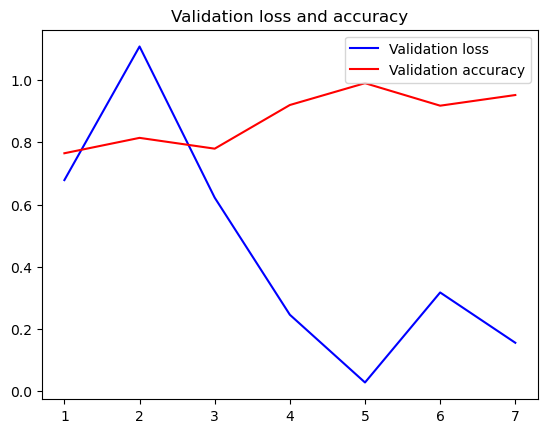

In [126]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Validation loss and accuracy')
plt.legend()
plt.show()

In [124]:
history.history.keys()

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'auc_1', 'false_negatives_1', 'false_positives_1', 'true_negatives_1', 'true_positives_1', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'val_auc_1', 'val_false_negatives_1', 'val_false_positives_1', 'val_true_negatives_1', 'val_true_positives_1', 'val_mean_absolute_error', 'val_mean_squared_error', 'lr'])